In [50]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
infile = '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-20000501/land_month.zarr.zip'

In [3]:
ds = xr.open_dataset(infile, engine='zarr')

In [8]:
da_spatial = ds['water'].isel({'time': 0, 'ensemble': 0})

In [10]:
da_spatial

<xarray.DataArray 'water' (lat: 90, lon: 144)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    area        (lat, lon) float32 2.758e+08 2.758e+08 2.758e+08 ... nan nan nan
    average_DT  timedelta64[ns] 31 days
    average_T1  datetime64[ns] 2000-05-03
    average_T2  datetime64[ns] 2000-06-03
    ensemble    int64 1
  * lat         (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.3 353.8 356.2 358.8
    time        object 2000-05-16 12:00:00
Attributes:
    cell_methods:   time: mean
    long_name:      mass of water in bucket
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2

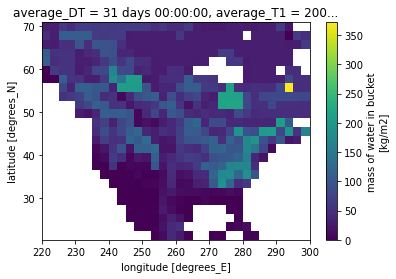

In [12]:
da_spatial.sel({'lat': slice(20, 70), 'lon': slice(220, 300)}).plot()

In [13]:
da_temporal = ds['water'].isel({'ensemble': 0})
da_temporal = da_temporal.sel({'lat': 47.45, 'lon': 237.69}, method='nearest')

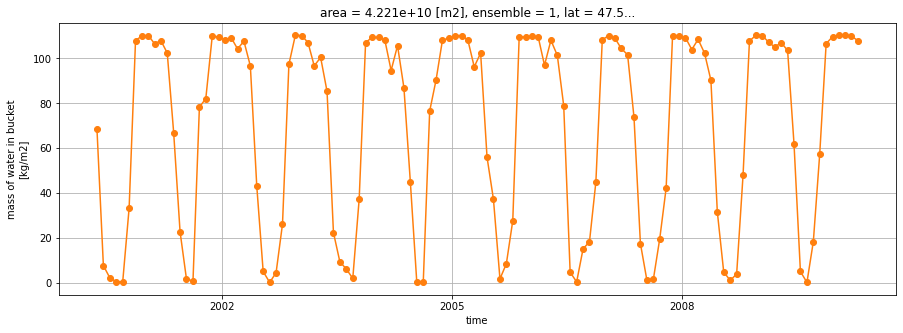

In [34]:
fig = plt.figure(figsize=[15, 5])
ax = fig.add_subplot(111)
da_temporal.plot(ax=ax, marker='o', color='tab:orange')
#da_temporal.isel({'time': slice(0, 12)}).plot(ax=ax, marker='o', color='tab:orange')
#da_temporal.isel({'time': slice(12, 24)}).plot(ax=ax, marker='o', color='tab:blue')
#da_temporal.isel({'time': slice(24, 36)}).plot(ax=ax, marker='o', color='tab:red')
#da_temporal.isel({'time': slice(36, 48)}).plot(ax=ax, marker='o', color='tab:green')
ax.grid(True)

## Water / soil moisture data

In [2]:
summer_water_file = '/g/data/xv83/dbi599/seatac/data/water_cafe-c5-d60-pX-f6_19950501-20201101_JJA-mean_seatac.zarr.zip'
ds_summer_water = xr.open_dataset(summer_water_file, engine='zarr')

In [3]:
ds_summer_water

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 52, lead_time: 10)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-16 00:00:00 ... 2020-11-16 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9
    time       (lead_time, init_date) object ...
Data variables:
    water      (init_date, lead_time, ensemble) float64 ...
Attributes:
    filename:   land_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Oct 19 14:58:36 2022: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

The first lead time for May starts comes from an incomplete year (and needs to be removed) and the last lead time from Nov starts.

In [4]:
ds_summer_water_may = ds_summer_water.sel({'init_date': ds_summer_water['init_date'].dt.month == 5})
ds_summer_water_may = ds_summer_water_may.isel({'lead_time': slice(1, 10)})
ds_summer_water_may

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 26, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-16 00:00:00 ... 2020-05-16 00:00:00
  * lead_time  (lead_time) int64 1 2 3 4 5 6 7 8 9
    time       (lead_time, init_date) object 1996-05-16 12:00:00 ... 2029-05-...
Data variables:
    water      (init_date, lead_time, ensemble) float64 21.22 20.18 ... 21.85
Attributes:
    filename:   land_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Oct 19 14:58:36 2022: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

## TXx data

In [5]:
txx_file = '/g/data/xv83/dbi599/seatac/data/tasmax_cafe-c5-d60-pX-f6_19950501-20201101_A-DEC-max_seatac.zarr.zip'
ds_txx = xr.open_dataset(txx_file, engine='zarr')

In [6]:
ds_txx_may = ds_txx.sel({'init_date': ds_summer_water['init_date'].dt.month == 5})
ds_txx_may

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 26, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1995-05-01 00:00:00 ... 2020-05-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
    time       (lead_time, init_date) object ...
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 ...
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Thu Dec 02 16:08:28 2021: /g/data/xv83/dbi599/miniconda3/envs...
    title:      AccessOcean-AM2

## RMSE data

In [7]:
rmse_df = pd.read_csv('/g/data/xv83/dbi599/seatac/figures/seatac_z500_rmse.csv')

In [8]:
rmse_df

,time,ensemble,rmse,tasmax,forecast
0,1995-06-01 12:00:00,1,170.983630,17.900177,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
1,1995-06-02 12:00:00,1,165.051530,18.975342,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
2,1995-06-03 12:00:00,1,153.706710,20.434600,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
3,1995-06-04 12:00:00,1,148.680950,20.269806,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
4,1995-06-05 12:00:00,1,149.765810,22.445526,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
...,...,...,...,...,...
4592635,2030-08-27 12:00:00,96,123.260980,23.570800,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-2020110...
4592636,2030-08-28 12:00:00,96,127.378050,20.826752,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-2020110...
4592637,2030-08-29 12:00:00,96,125.334990,20.304565,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-2020110...
4592638,2030-08-30 12:00:00,96,122.511894,20.812683,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-2020110...


## Put it together

In [35]:
init_date_index = 0
year = str(ds_txx_may['init_date'].values[init_date_index].year)
month = str(ds_txx_may['init_date'].values[init_date_index].month).zfill(2)
day = str(ds_txx_may['init_date'].values[init_date_index].day).zfill(2)
forecast = f'/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-{year}{month}{day}/atmos_isobaric_daily.zarr.zip'

In [36]:
forecast

'/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19950501/atmos_isobaric_daily.zarr.zip'

In [37]:
ensemble_index = 6
init_selection = rmse_df['forecast'] == forecast
ensemble_selection = rmse_df['ensemble'] == ensemble_index + 1
rmse_df_subset = rmse_df[init_selection & ensemble_selection]
rmse_df_subset

,time,ensemble,rmse,tasmax,forecast
5520,1995-06-01 12:00:00,7,120.51092,20.418762,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5521,1995-06-02 12:00:00,7,106.33962,19.018127,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5522,1995-06-03 12:00:00,7,107.06085,19.228119,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5523,1995-06-04 12:00:00,7,118.22503,23.300018,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5524,1995-06-05 12:00:00,7,128.45787,23.731842,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
...,...,...,...,...,...
6435,2004-08-27 12:00:00,7,120.48636,27.576904,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
6436,2004-08-28 12:00:00,7,149.07346,25.495850,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
6437,2004-08-29 12:00:00,7,167.47093,14.052002,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
6438,2004-08-30 12:00:00,7,174.14450,14.857849,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...


In [38]:
lead_time_index = 0
txx = float(ds_txx_may['tasmax'].isel({'ensemble': ensemble_index, 'init_date': init_date_index, 'lead_time': lead_time_index}).values)
water = float(ds_summer_water_may['water'].isel({'ensemble': ensemble_index, 'init_date': init_date_index, 'lead_time': lead_time_index}).values)

In [39]:
txx

39.852508544921875

In [40]:
water

7.024606325056242

In [41]:
rmse_df_subset.iloc[(rmse_df_subset['tasmax'] - txx).abs().argsort(), :]
            

,time,ensemble,rmse,tasmax,forecast
5949,1999-08-01 12:00:00,7,73.093000,39.714325,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
6057,2000-08-17 12:00:00,7,59.082394,39.511780,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5950,1999-08-02 12:00:00,7,68.620770,39.325195,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
6059,2000-08-19 12:00:00,7,100.445110,39.284090,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5676,1996-08-04 12:00:00,7,74.635430,39.258026,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
...,...,...,...,...,...
5889,1999-06-02 12:00:00,7,159.928070,10.540070,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5800,1998-06-05 12:00:00,7,157.261610,9.678131,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5798,1998-06-03 12:00:00,7,169.572110,9.416565,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...
5985,2000-06-06 12:00:00,7,165.934950,9.210114,/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-1995050...


In [42]:
rmse_list = []
txx_list = []
water_list = []
n_init_dates, n_lead_times, n_ensembles = ds_txx_may['tasmax'].shape
for init_date_index in range(n_init_dates):
    for lead_time_index in range(n_lead_times):
        for ensemble_index in range(n_ensembles):
            year = str(ds_txx_may['init_date'].values[init_date_index].year)
            month = str(ds_txx_may['init_date'].values[init_date_index].month).zfill(2)
            day = str(ds_txx_may['init_date'].values[init_date_index].day).zfill(2)
            forecast = f'/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-{year}{month}{day}/atmos_isobaric_daily.zarr.zip'
            init_selection = rmse_df['forecast'] == forecast
            ensemble_selection = rmse_df['ensemble'] == ensemble_index + 1
            rmse_df_subset = rmse_df[init_selection & ensemble_selection]
            txx = float(ds_txx_may['tasmax'].isel({'ensemble': ensemble_index, 'init_date': init_date_index, 'lead_time': lead_time_index}).values)
            water = float(ds_summer_water_may['water'].isel({'ensemble': ensemble_index, 'init_date': init_date_index, 'lead_time': lead_time_index}).values)
            rmse_selection = rmse_df_subset.iloc[(rmse_df_subset['tasmax'] - txx).abs().argsort(), :].iloc[0]
            #assert np.isclose(rmse_selection['tasmax'], txx)
            if not np.isclose(rmse_selection['tasmax'], txx):
                print(init_date_index, lead_time_index, ensemble_index)
                print(rmse_selection['tasmax'], txx)
            else:
                rmse = rmse_selection['rmse']
                txx_list.append(txx)
                water_list.append(water)
                rmse_list.append(rmse)
            
rmse_ds = pd.Series(rmse_list)
txx_ds = pd.Series(txx_list)
water_ds = pd.Series(water_list)

df = pd.concat([txx_ds, water_ds, rmse_ds], join='inner', axis=1)
df.columns = ['txx', 'water', 'rmse']

0 0 6
39.714325 39.852508544921875
0 0 9
32.31192 32.29034423828125
0 0 18
37.241913 37.298309326171875
0 0 31
35.881226 35.8599853515625
0 0 36
37.143524 37.120208740234375
0 0 75
36.33139 36.309600830078125
0 0 76
38.842163 38.766754150390625
0 1 1
32.26886 32.273590087890625
0 1 3
38.71231 38.630401611328125
0 1 48
38.105316 38.16131591796875
0 1 82
35.023773 35.05328369140625
0 1 88
35.51483 35.525665283203125
0 2 17
32.03134 32.033416748046875
0 2 42
37.90454 37.699554443359375
0 2 44
39.923798 39.767974853515625
0 2 95
36.04724 36.03607177734375
0 3 11
34.65219 34.629669189453125
0 3 17
36.551147 36.530792236328125
0 3 60
36.929108 36.89300537109375
0 3 65
36.508667 36.581085205078125
0 3 89
36.282196 36.239166259765625
0 4 5
34.732666 34.721282958984375
0 4 26
32.34201 32.340362548828125
0 4 37
36.2612 36.34136962890625
0 4 40
37.75467 37.716064453125
0 4 49
33.62976 33.617919921875
0 4 61
34.952118 34.88055419921875
0 4 63
29.94925 29.952484130859375
0 5 15
36.15976 36.18930053

4 2 64
39.154266 39.261260986328125
4 2 71
36.60208 36.60491943359375
4 2 84
35.995117 36.04833984375
4 3 11
37.624115 37.673492431640625
4 3 23
36.997223 36.998046875
4 3 36
37.59079 37.552520751953125
4 3 44
36.28412 36.292144775390625
4 3 47
36.4328 36.51019287109375
4 3 56
38.00299 38.006622314453125
4 3 73
38.53473 38.429656982421875
4 3 75
37.17798 37.15997314453125
4 4 20
33.959045 33.97100830078125
4 4 38
38.17093 38.141326904296875
4 4 41
33.279266 33.271514892578125
4 4 51
35.66635 35.666961669921875
4 4 53
36.64966 36.676239013671875
4 4 58
40.65143 40.9866943359375
4 4 89
34.963104 34.98907470703125
4 4 90
36.632385 36.65814208984375
4 5 22
37.743835 37.688201904296875
4 5 36
37.499237 37.45574951171875
4 5 58
37.1019 37.25042724609375
4 6 3
31.633148 31.61444091796875
4 6 18
40.253876 41.0445556640625
4 6 30
38.267395 38.274139404296875
4 6 37
37.662476 37.917266845703125
4 6 41
34.602936 34.632598876953125
4 6 53
35.3461 35.33087158203125
4 6 74
37.213074 37.1781311035156

8 1 5
35.53598 35.5067138671875
8 1 36
35.59555 35.615478515625
8 1 52
34.074677 34.0538330078125
8 1 53
37.843536 37.831756591796875
8 1 55
35.701385 35.69598388671875
8 1 77
34.399567 34.313934326171875
8 2 0
34.41812 34.437896728515625
8 2 2
35.602722 35.541290283203125
8 2 13
35.446228 35.413177490234375
8 2 18
37.097504 37.095550537109375
8 2 20
39.408478 39.8909912109375
8 2 77
32.56122 32.5323486328125
8 2 90
38.097992 38.245574951171875
8 3 37
36.776917 36.74078369140625
8 3 66
39.78766 40.556060791015625
8 3 80
35.561188 35.54071044921875
8 4 4
40.199524 40.75494384765625
8 4 19
35.242767 35.230987548828125
8 4 56
37.82849 37.8399658203125
8 4 64
34.535522 34.574920654296875
8 5 22
34.660248 34.6805419921875
8 5 49
38.06299 38.305511474609375
8 5 61
38.869476 38.797332763671875
8 5 82
36.91736 37.062225341796875
8 5 91
29.112274 29.111175537109375
8 6 14
34.125916 34.07122802734375
8 6 48
36.47699 36.455078125
8 6 49
35.48645 35.520233154296875
8 6 90
35.93991 35.9651184082031

12 2 43
38.481873 38.4833984375
12 2 75
34.10437 34.14825439453125
12 3 4
33.000214 33.039825439453125
12 3 8
35.917206 35.91326904296875
12 3 16
31.360046 31.36688232421875
12 3 28
34.20395 34.225006103515625
12 3 51
36.122467 36.107147216796875
12 3 55
34.03134 34.027862548828125
12 3 73
38.34915 38.39678955078125
12 3 79
37.933777 37.716064453125
12 4 11
33.961823 33.97576904296875
12 4 14
35.961273 35.95648193359375
12 4 29
37.65393 37.742523193359375
12 4 49
34.20865 34.253265380859375
12 4 65
37.969513 38.0274658203125
12 4 77
34.19052 34.200592041015625
12 4 86
37.588287 37.564849853515625
12 5 6
38.574524 38.738311767578125
12 5 14
36.986176 37.176727294921875
12 5 18
38.713867 38.8865966796875
12 5 45
34.318634 34.3333740234375
12 5 48
38.98709 39.00360107421875
12 5 52
38.48816 38.498077392578125
12 5 64
37.86316 37.887359619140625
12 5 79
39.008118 38.845947265625
12 6 20
36.99936 36.997467041015625
12 6 24
35.04367 35.025390625
12 6 49
35.67813 35.692108154296875
12 6 62
39

16 2 51
36.222473 36.218505859375
16 2 55
36.25827 36.252685546875
16 2 71
34.390533 34.381500244140625
16 2 74
37.99713 37.97357177734375
16 2 89
35.84619 35.883087158203125
16 2 95
35.408356 35.411651611328125
16 3 1
38.580933 38.64703369140625
16 3 14
34.86566 34.83404541015625
16 3 28
39.191223 39.2537841796875
16 3 34
33.224213 33.212188720703125
16 3 63
38.54544 38.517333984375
16 3 75
38.098938 38.131622314453125
16 3 80
31.316162 31.304931640625
16 3 85
37.98416 37.95123291015625
16 3 90
36.566406 36.609710693359375
16 4 15
38.707275 38.6666259765625
16 4 23
35.426147 35.457000732421875
16 4 39
36.08139 36.215728759765625
16 4 56
37.413696 37.665802001953125
16 4 67
36.91501 36.939697265625
16 4 83
38.914673 39.27362060546875
16 5 2
36.808594 36.8179931640625
16 5 15
38.707275 38.684783935546875
16 5 16
38.996277 38.9105224609375
16 5 34
36.8956 36.89874267578125
16 5 45
35.91626 35.969879150390625
16 5 52
32.86023 32.840057373046875
16 5 56
34.799774 34.81549072265625
16 5 67


20 1 43
38.561554 38.4871826171875
20 1 44
35.86142 35.904449462890625
20 1 55
37.302063 37.287322998046875
20 1 61
36.384033 36.469207763671875
20 2 26
36.095093 36.10784912109375
20 2 30
36.281372 36.22149658203125
20 2 68
36.257874 36.32073974609375
20 2 94
37.43869 37.5758056640625
20 3 36
36.722748 36.718505859375
20 3 49
35.506317 35.49322509765625
20 4 11
39.079132 39.028350830078125
20 4 20
37.791107 37.749969482421875
20 4 36
35.70694 35.717010498046875
20 4 42
36.355865 36.314208984375
20 4 47
36.47403 36.45294189453125
20 4 65
39.330994 39.120452880859375
20 4 66
38.963013 38.8629150390625
20 4 83
36.096252 36.23052978515625
20 4 85
38.970642 39.69091796875
20 4 86
36.828857 36.853546142578125
20 5 4
37.25305 37.19488525390625
20 5 7
36.339294 36.310455322265625
20 5 16
35.683044 35.6839599609375
20 5 17
35.032288 35.04510498046875
20 5 26
36.577454 36.53887939453125
20 5 45
36.716858 36.744354248046875
20 5 70
33.948242 33.94970703125
20 6 8
34.493225 34.512115478515625
20 

24 4 34
37.5661 37.525299072265625
24 4 44
37.554047 37.535369873046875
24 4 47
36.263428 36.234405517578125
24 4 61
32.684937 32.69659423828125
24 4 64
37.374054 37.286651611328125
24 4 75
36.557526 36.582061767578125
24 4 78
38.99527 38.8541259765625
24 4 79
36.95688 36.978851318359375
24 5 20
39.322693 39.33941650390625
24 5 29
37.813904 37.810638427734375
24 5 43
37.994995 37.971466064453125
24 5 70
37.309174 37.34130859375
24 5 80
32.85132 32.7857666015625
24 6 0
39.09668 39.058349609375
24 6 8
36.86841 36.798919677734375
24 6 39
40.221222 40.313201904296875
24 6 47
38.250824 38.20806884765625
24 6 79
35.30423 35.2537841796875
24 7 6
36.946503 36.915740966796875
24 7 21
34.640503 34.639190673828125
24 7 53
34.44455 34.484161376953125
24 7 74
36.931458 36.923309326171875
24 7 77
38.725647 38.791259765625
24 7 78
38.99527 38.921722412109375
24 7 79
36.17694 36.14068603515625
24 7 84
42.89096 42.85235595703125
24 7 91
35.217896 35.244781494140625
24 7 93
38.407684 38.42010498046875
2

In [43]:
df

,txx,water,rmse
0,36.810120,21.215596,89.361470
1,36.896881,20.176554,81.780045
2,37.036469,14.502757,100.967490
3,35.738770,55.245468,94.709236
4,36.420502,17.509512,85.826770
...,...,...,...
20963,41.080261,16.173044,64.898575
20964,36.812744,29.505526,113.879380
20965,35.320984,38.988641,86.596320
20966,37.233215,7.375331,111.071430


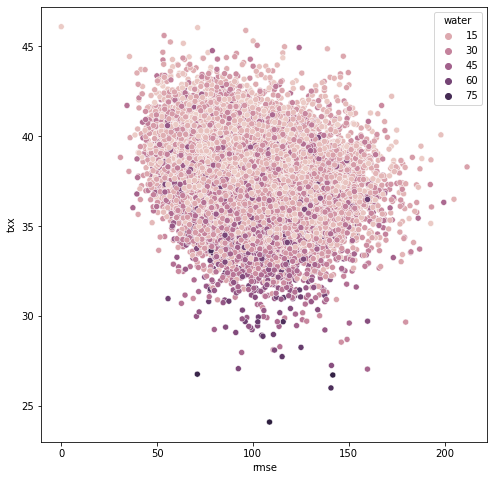

In [53]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='rmse', y='txx', hue='water')
plt.savefig(
    '/g/data/xv83/dbi599/seatac/figures/seatac_scatter-rmse-txx-water.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300,
)